In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [2]:
import pathlib

dir_path = './dataset/images'
dir_path = pathlib.Path(dir_path)

In [3]:
total_classes = len(list(dir_path.glob('*')))
total_classes

4

## creating the dict

In [4]:
images_dict = {
    'messi': list(dir_path.glob('messi/*.jpg')),
    'neymar': list(dir_path.glob('neymar/*.jpg')),
    'rohit': list(dir_path.glob('rohit/*.jpg')),
    'ronaldo': list(dir_path.glob('ronaldo/*.jpg'))
}

In [5]:
class_dict = {
    'messi': 0,
    'neymar': 1,
    'rohit': 2,
    'ronaldo': 3
}

In [6]:
#defining the image size
IMAGE_SIZE = [224, 224]

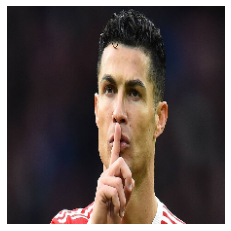

In [7]:
# exploring the data 

img = cv2.imread(str(images_dict['ronaldo'][3]))
resized_img = cv2.resize(img, IMAGE_SIZE)
final_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(final_img)

# Preprocessing 

In [8]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
            width_shift_range=0.2,
            height_shift_range=0.2,
            zoom_range=0.2,
            brightness_range=[0, 1],
            fill_mode='nearest'
        )

In [9]:
for p_name, p_images in images_dict.items():
    x = []
    for image in p_images:
        image = cv2.imread(str(image))
        image = cv2.resize(image, IMAGE_SIZE)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        x.append(image)

    x = np.array(x)
    print(x.shape)    
    
    i = 0;
    for batch in datagen.flow(x, batch_size=1, save_to_dir='./dataset/images/'+p_name, save_prefix='copy', save_format='jpg'):
        i += 1
        if i > 20:
            break

(11, 224, 224, 3)
(11, 224, 224, 3)
(11, 224, 224, 3)
(11, 224, 224, 3)


In [10]:
total_images_genrated = len(list(dir_path.glob('*/*.jpg')))
print("Total images generated are: ",total_images_genrated)

Total images generated are:  128


# Creating x and y

In [11]:
x, y = [], []

for p_name, p_images in images_dict.items():
    for image in p_images:
        image = cv2.imread(str(image))
        image = cv2.resize(image, IMAGE_SIZE)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        x.append(image)
        y.append(class_dict[p_name])

In [12]:
x = np.array(x)
y = np.array(y)

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [14]:
x_train = x_train / 255
x_test = x_test / 255

# Model building

In [49]:
from keras.models import Sequential

model = Sequential([
    layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=IMAGE_SIZE+[3]),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(total_classes, activation='softmax')
])

In [50]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [51]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
2/2 [==============================] - 3s 129ms/step - loss: 2.1882 - accuracy: 0.2424
Epoch 2/15
2/2 [==============================] - 2s 127ms/step - loss: 8.5722 - accuracy: 0.3030
Epoch 3/15
2/2 [==============================] - 2s 119ms/step - loss: 4.0416 - accuracy: 0.2727
Epoch 4/15
2/2 [==============================] - 2s 125ms/step - loss: 2.6057 - accuracy: 0.4242
Epoch 5/15
2/2 [==============================] - 2s 130ms/step - loss: 2.5880 - accuracy: 0.4242
Epoch 6/15
2/2 [==============================] - 2s 123ms/step - loss: 1.7318 - accuracy: 0.5152
Epoch 7/15
2/2 [==============================] - 2s 112ms/step - loss: 1.0431 - accuracy: 0.6364
Epoch 8/15
2/2 [==============================] - 2s 124ms/step - loss: 1.0872 - accuracy: 0.5455
Epoch 9/15
2/2 [==============================] - 2s 122ms/step - loss: 1.1539 - accuracy: 0.5455
Epoch 10/15
2/2 [==============================] - 2s 125ms/step - loss: 1.1048 - accuracy: 0.6061
Epoch 11/15
2/2 [==

# Making sample prediction

[[0.3792443  0.2623422  0.17270762 0.18570581]]
0


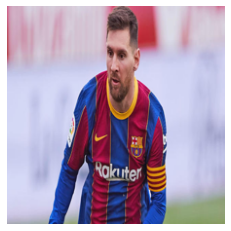

In [54]:
from PIL import Image

img = Image.open("./dataset/predict/messi.jpg").resize(IMAGE_SIZE)
plt.axis('off')
plt.imshow(img)
img = np.array(img) / 255
img = img[np.newaxis, ...]
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction)
print(prediction)

In [59]:

model.save('face.h5')